In [1]:
# Title: DMRG Ground State Search and Compression Algorithms
# Author: Aaron Sander
# Date: March-May 2020

# This program is used for initial learning of tensor network methods
# to be used in my bachelor thesis.
# It is an implementation of the Density Matrix Renormalization Group (DMRG)
# for the ground state search of a given Hamiltonian as an MPO as well as
# for compressing an arbitrary quantum state which has relevant applications
# in data compression and graph embedding.

### NOTE: This code is written for learning purposes. It is not meant
###       to be optimized for speed/efficiency, but has readability in mind.

In [2]:
######################### IMPORTS #############################################
from canonical_forms import *
from compression import *
from contractions import *
import initializations as init
from metrics import *
import machine_learning as ML
import activation_functions as act

import ground_state_search as gnd

import numpy as np
import math

# Ground State Search
This section looks for the ground state of the Ising Model with given parameters as accurately as a given threshold.

In [3]:
MPO = init.initialize_quantum_ising_MPO(num_sites=3, J=1, g=1)

Initial Energy: -2.061051272212098
Energy: -3.1264803385501057 BondDim: 1
Energy: -3.1608374570067825 BondDim: 1
Energy: -3.1622011734112774 BondDim: 1
Energy: -3.1622744810130947 BondDim: 1
Energy: -3.493959207434934 BondDim: 2
Energy: -3.493959207434934 BondDim: 2
Energy: -3.4939592074349335 BondDim: 2


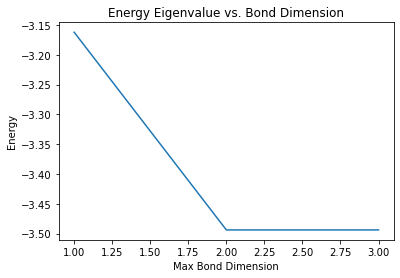

In [28]:
E, V, max_bond_dim = gnd.ground_state_search(MPO, threshold=1e-3, plot=1)

# Compression
This section converts an arbitrary n-bit string into an MPS and compresses it into one with a lower bond dimension.
The metrics used are cosine similarity (0 worst, 1 perfect), loss (1-cosSim), and Euclidean distance (-2 worst, 0 best)

In [151]:
data = init.initialize_random_normed_vector(length=1024)

In [152]:
d = 2
raw_state = vector_to_left_canonical_MPS(data, phys_dim=d, num_sites=int(math.log(len(data), d)))

In [153]:
compressions, dist, sim = compress(raw_state, threshold=1e-3, plot=0)

Sim: 0.8611160961576104 Dist: 0.5270368181491483 BondDim: 1
Sim: 0.8678771672237351 Dist: 0.5140483105239528 BondDim: 2
Sim: 0.8769270683621501 Dist: 0.4961308932889572 BondDim: 3
Sim: 0.886380135082954 Dist: 0.47669668536092413 BondDim: 4
Sim: 0.8948694618651561 Dist: 0.45854233857920706 BondDim: 5
Sim: 0.9077582801897128 Dist: 0.42951535434786886 BondDim: 6
Sim: 0.9184033290466453 Dist: 0.4039719568320439 BondDim: 7
Sim: 0.9304812954029634 Dist: 0.37287720390776374 BondDim: 8
Sim: 0.9391203312843743 Dist: 0.3489403064010414 BondDim: 9
Sim: 0.947851560684379 Dist: 0.32295027269107723 BondDim: 10
Sim: 0.9570450681661025 Dist: 0.2931038445121377 BondDim: 11
Sim: 0.9630654926937834 Dist: 0.27178854761088383 BondDim: 12
Sim: 0.9698369009294516 Dist: 0.24561392090249298 BondDim: 13
Sim: 0.9769484206780479 Dist: 0.2147164610455038 BondDim: 14
Sim: 0.9818969001381355 Dist: 0.19027926771913337 BondDim: 15
Sim: 0.9866176879315396 Dist: 0.16359897352037844 BondDim: 16
Sim: 0.9890433149644058 Di

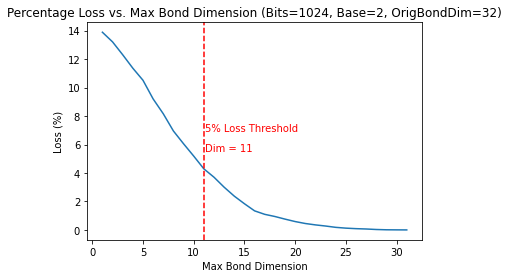

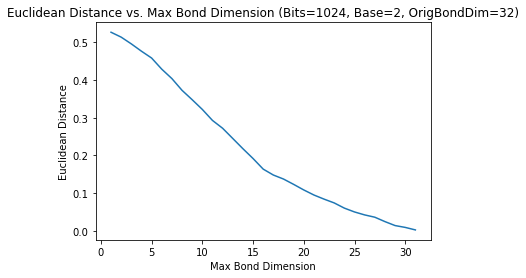

In [154]:
compressions, dist, sim = compress(raw_state, threshold=1e-3, plot=1)

In [125]:
data = np.random.randint(2, size=(512,))
d = 2
raw_state = vector_to_left_canonical_MPS(data, phys_dim=d, num_sites=int(math.log(len(data), d)))

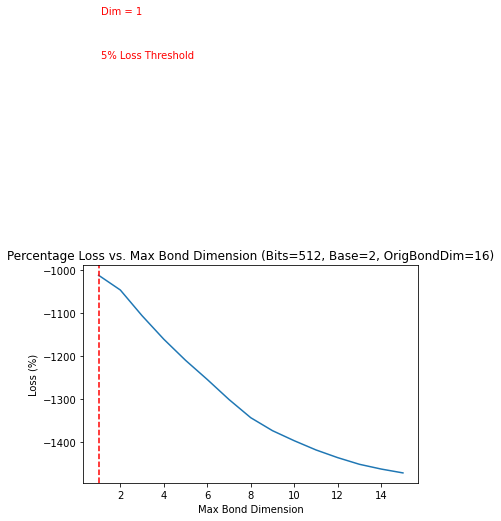

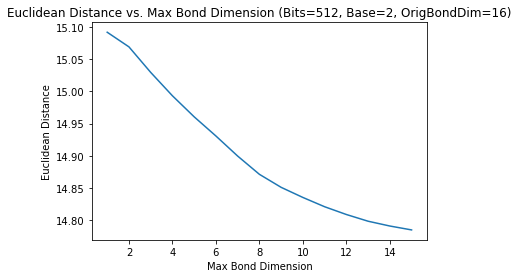

In [126]:
compressions, dist, sim = compress(raw_state, threshold=1e-3, plot=1)

In [127]:
import neural_networks as nn

In [128]:
nn.calculate_params(compressions[7])

552

In [129]:
nn.calculate_params(data)

512

In [144]:
import contractions as con
state = compressions[-1]
for i in range(len(state)-1):
    if i == 0:
        temp = con.contract_horizontal(state[i], state[i+1], 'right')
    else:
        temp = con.contract_horizontal(temp, state[i+1], 'right')

In [149]:
metrics.overlap(state, raw_state)

14.784486751780594